In [1]:
!nvidia-smi

Mon Nov 25 04:24:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!ls

Birds.zip  sample_data


In [4]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [10]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 46.0ms
Speed: 2.8ms preprocess, 46.0ms inference, 728.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


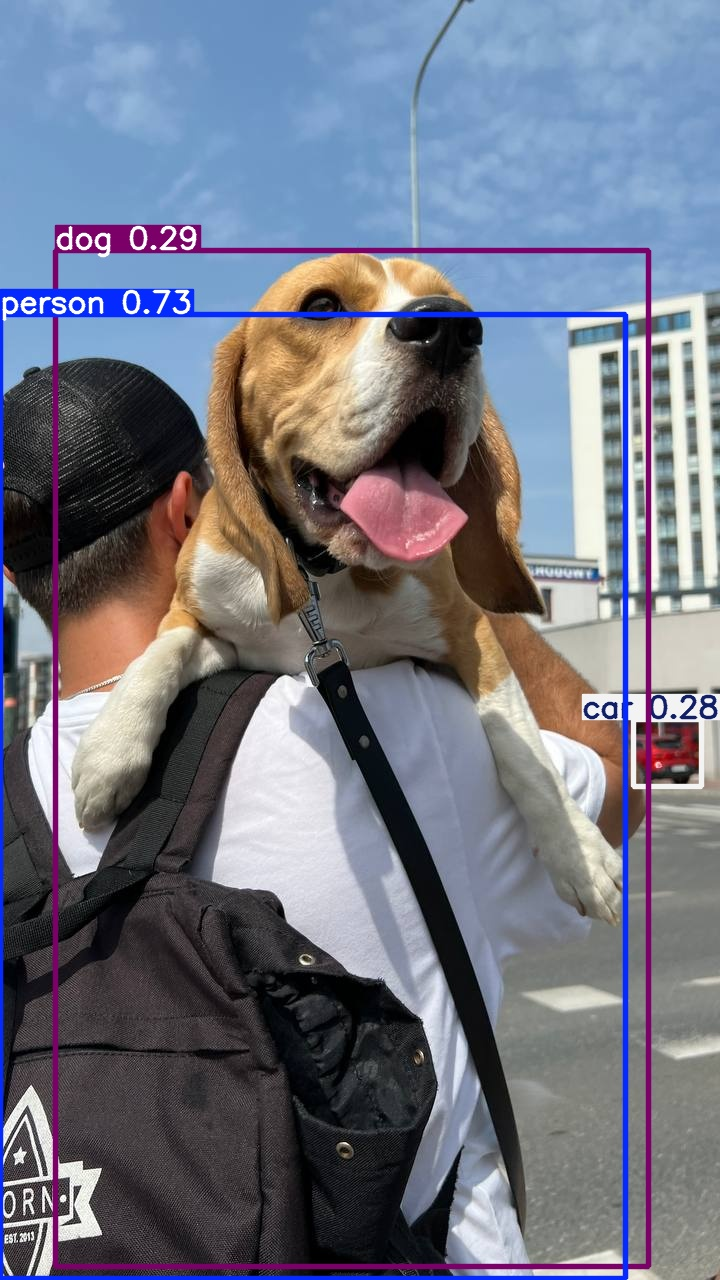

In [11]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpg', height=600)

In [12]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 78.2ms
Speed: 3.6ms preprocess, 78.2ms inference, 925.7ms postprocess per image at shape (1, 3, 640, 384)


In [13]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [14]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [15]:
results[0].boxes.cls


tensor([ 0., 16.,  2.], device='cuda:0')

In [17]:
# !unzip Birds.zip

In [18]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=60 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 291MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

In [19]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1732508911.6095a3dc6b58.6096.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7500.jpg  weights
P_curve.png					    train_batch7501.jpg
PR_curve.png					    train_batch7502.jpg


In [ ]:
!mv  /content/data.yaml /content/bird

/content


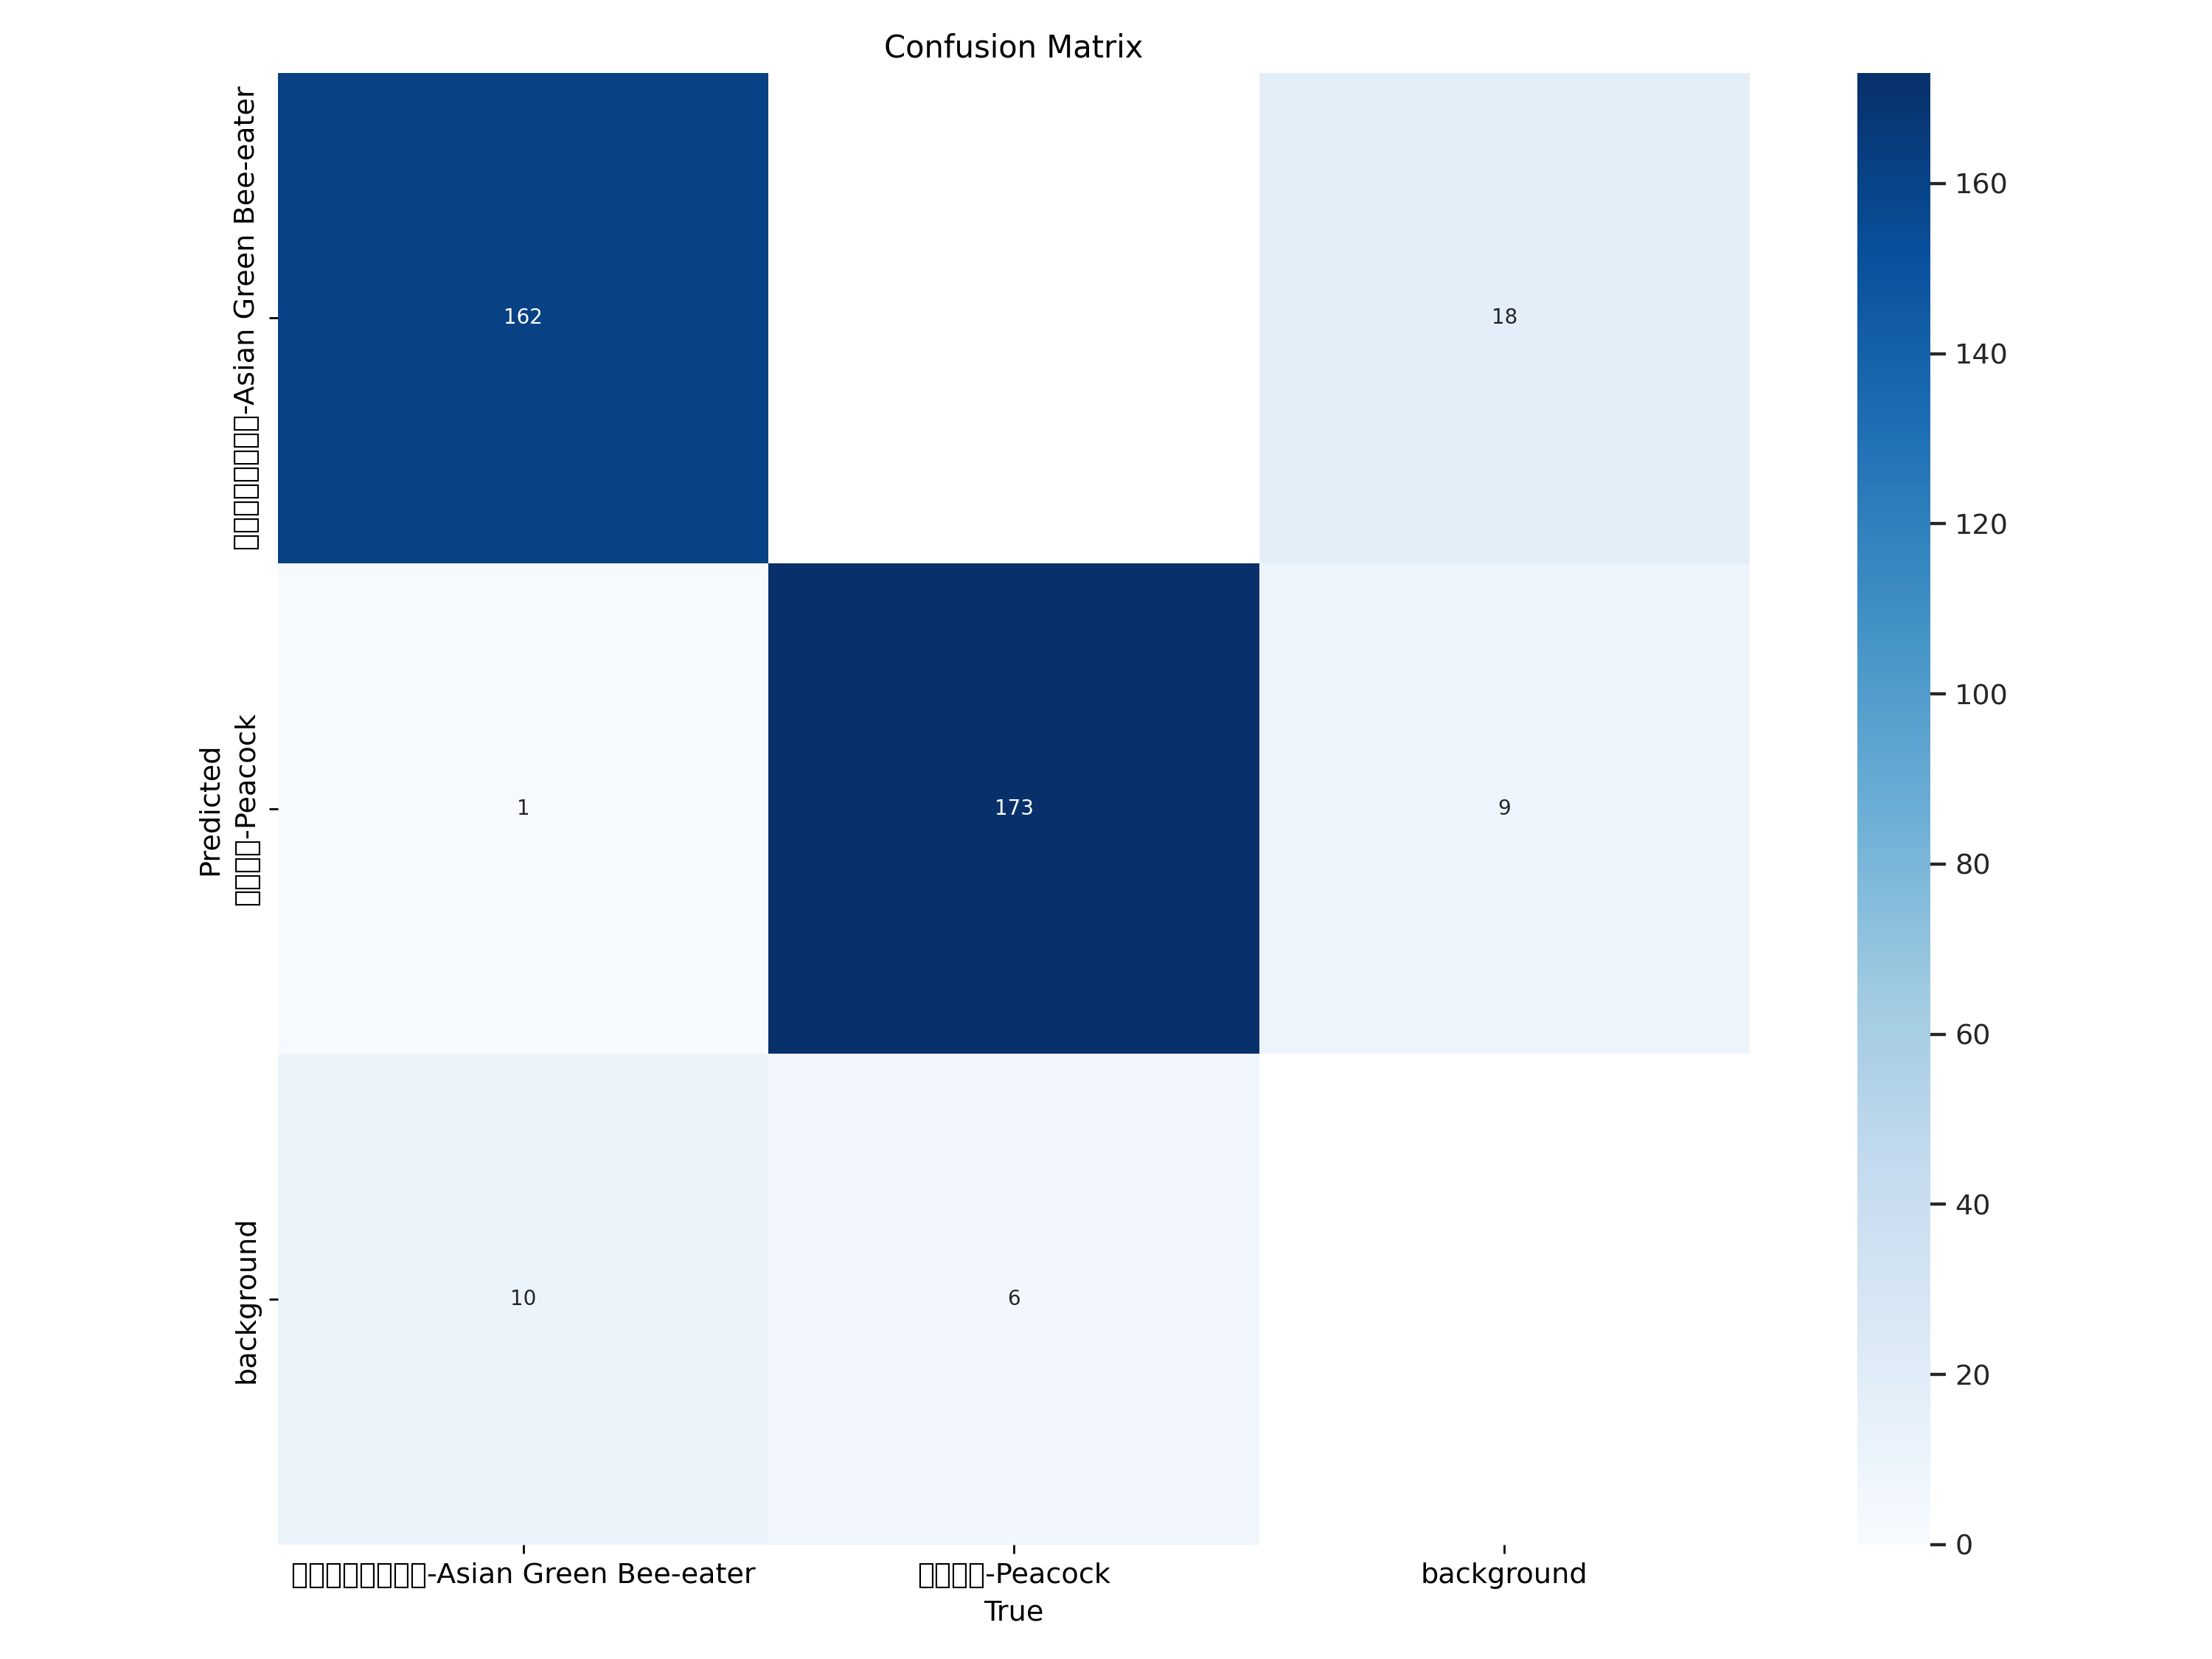

In [20]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

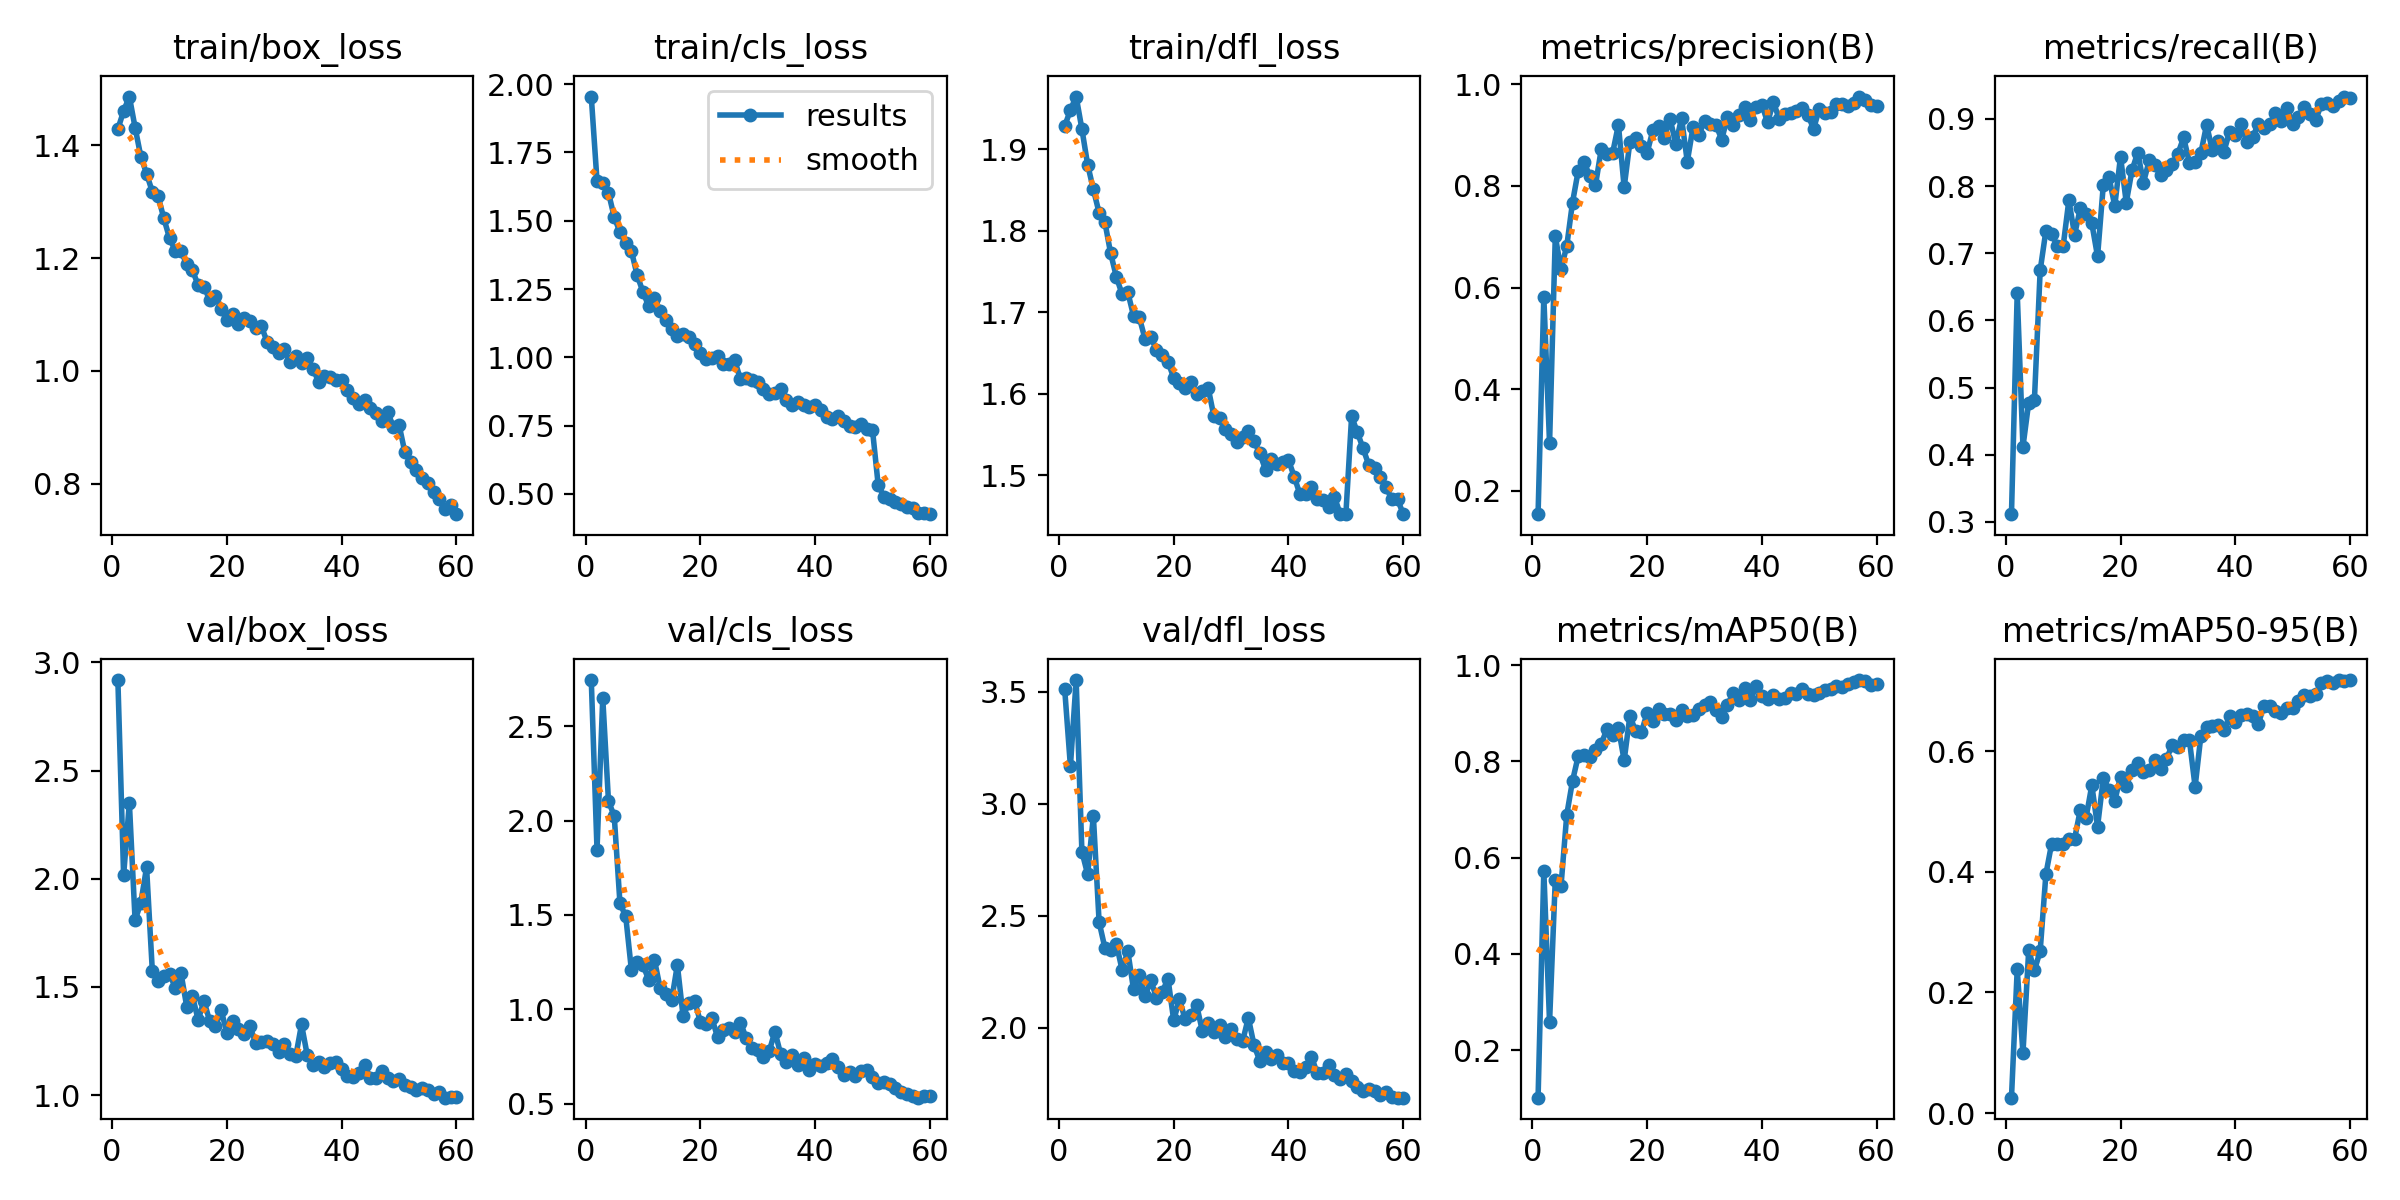

In [21]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

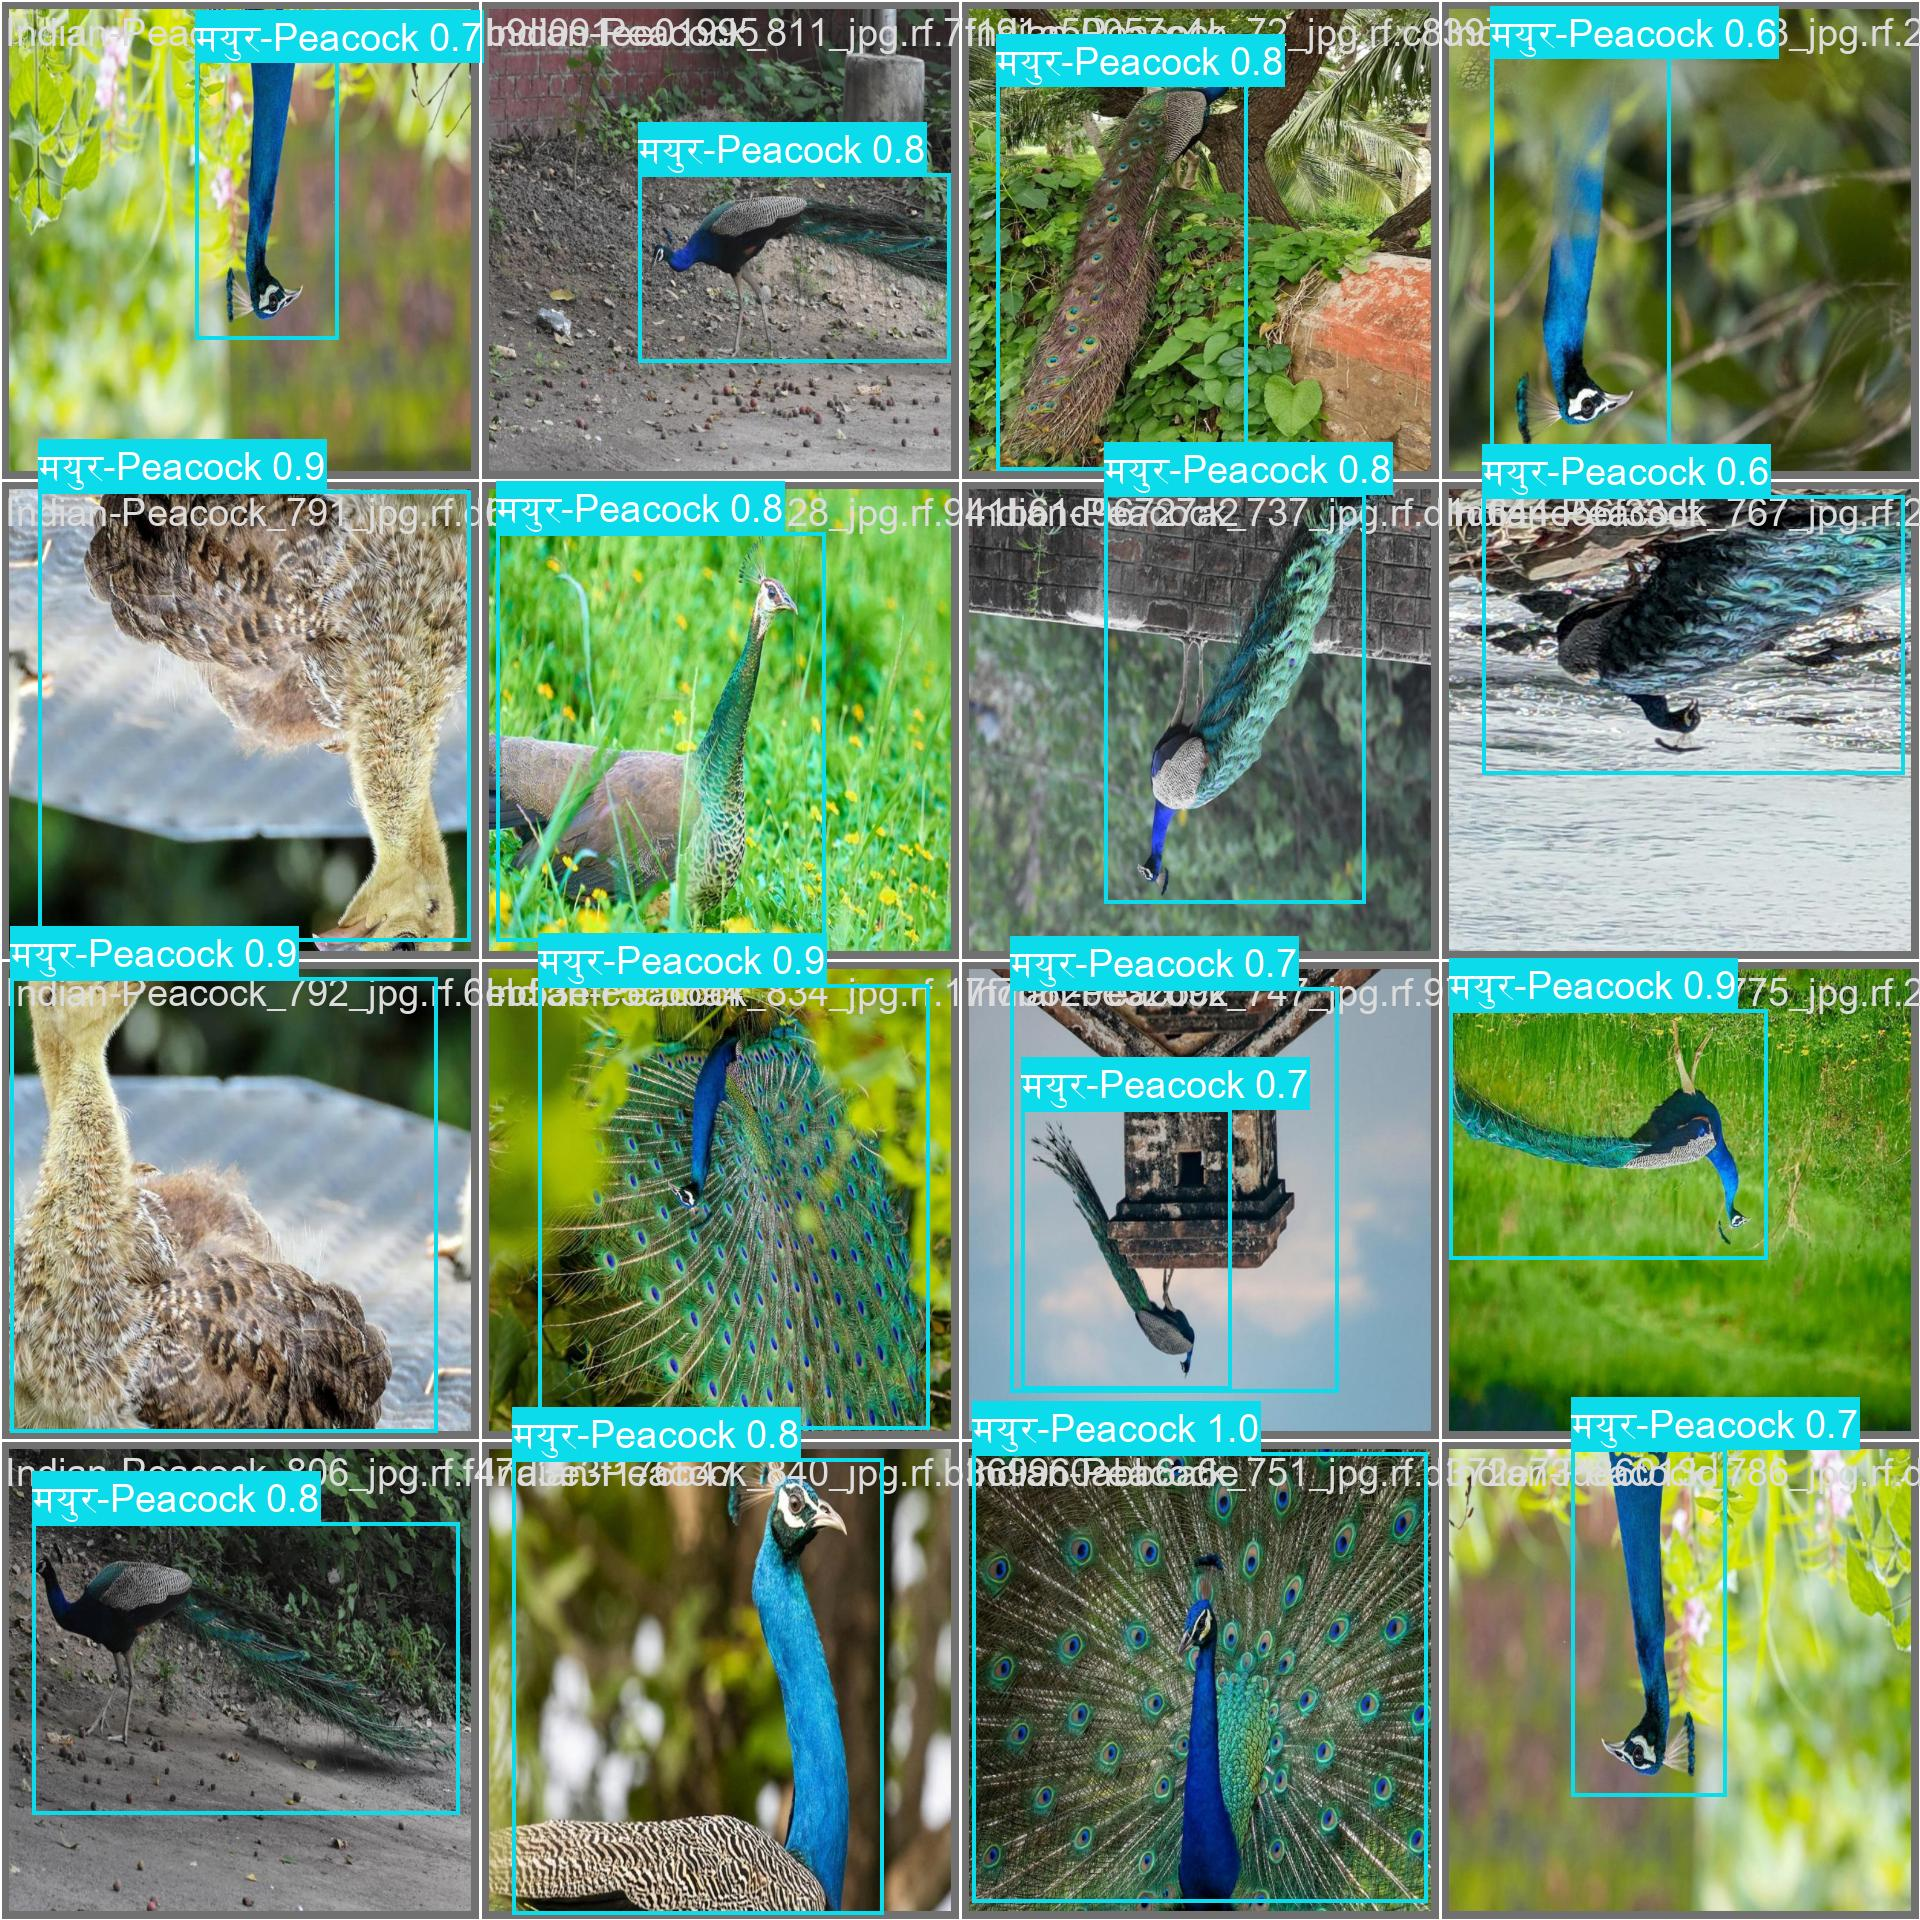

In [22]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [23]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100% 299/299 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:07<00:00,  2.67it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultr

In [24]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/valid/images  plots = True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/299 /content/valid/images/Brown-Headed-Barbet_1004_jpg.rf.391970a03c30e9f9df83a30feae0636d.jpg: 800x800 2 मुरलीचरा-Asian Green Bee-eaters, 22.9ms
image 2/299 /content/valid/images/Brown-Headed-Barbet_1011_jpg.rf.7e5bea50ba21bbf3691711ac0e3bafe0.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.9ms
image 3/299 /content/valid/images/Brown-Headed-Barbet_1028_jpg.rf.57c648bb9d3bc72143447aba4610a05e.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.8ms
image 4/299 /content/valid/images/Brown-Headed-Barbet_1048_jpg.rf.2e5e23c866557f9a1ec2d4aa9a4c0ed6.jpg: 800x800 2 मुरलीचरा-Asian Green Bee-eaters, 22.9ms
image 5/299 /content/valid/images/Brown-Headed-Barbet_1061_jpg.rf.90b79c05fff5198b4ab14e0ec2bc4d0f.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.8ms
image 6/299 /content/valid/images/Brown-Headed-Barbet_1069_jpg.rf.e

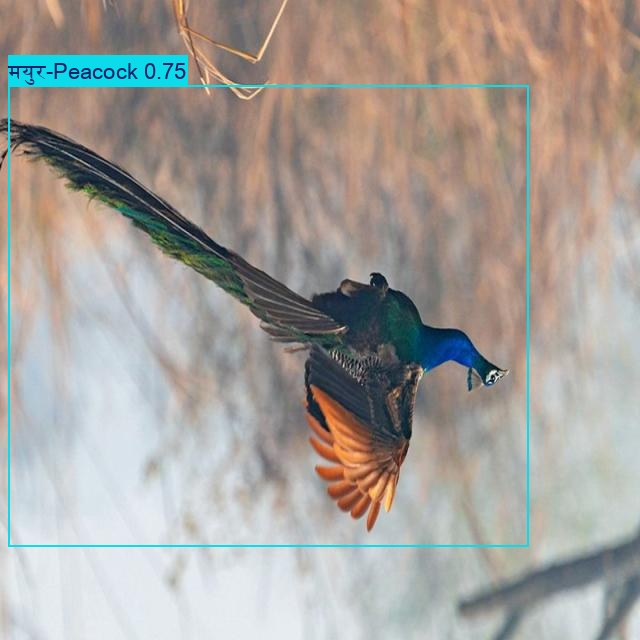

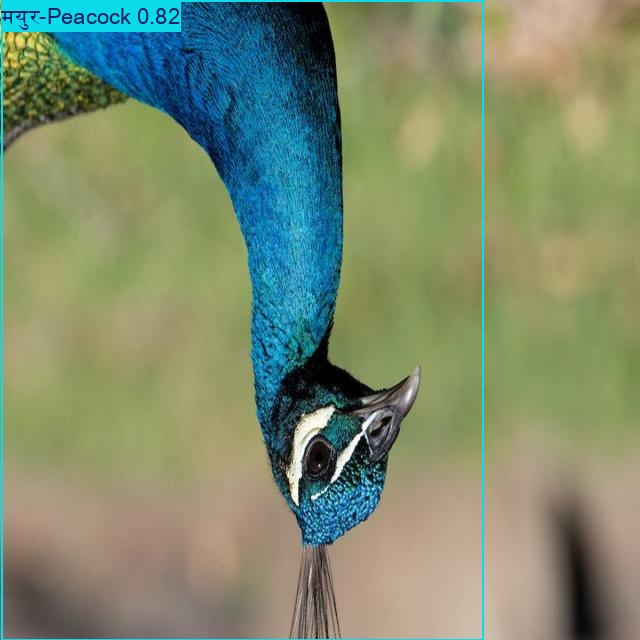

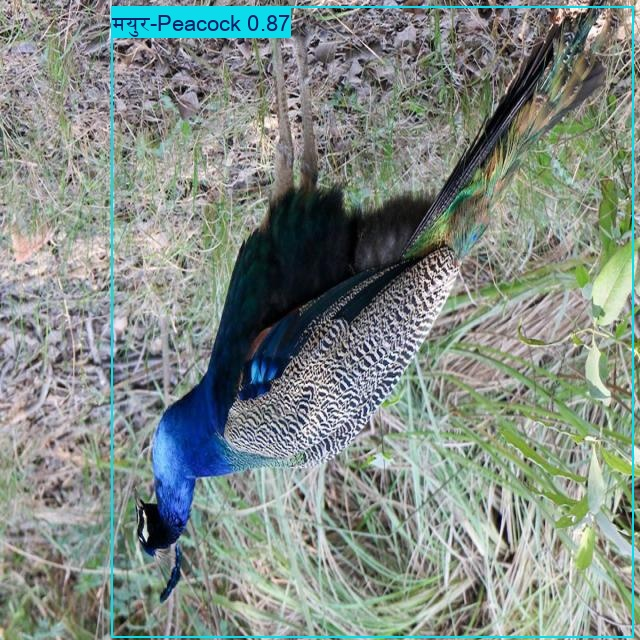

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [28]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/valid/labels.cache... 299 images, 0 backgrounds, 0 corrupt: 100% 299/299 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:06<00:00,  2.74it/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:470: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultr

In [29]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/valid/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/299 /content/valid/images/Brown-Headed-Barbet_1004_jpg.rf.391970a03c30e9f9df83a30feae0636d.jpg: 800x800 2 मुरलीचरा-Asian Green Bee-eaters, 22.8ms
image 2/299 /content/valid/images/Brown-Headed-Barbet_1011_jpg.rf.7e5bea50ba21bbf3691711ac0e3bafe0.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.9ms
image 3/299 /content/valid/images/Brown-Headed-Barbet_1028_jpg.rf.57c648bb9d3bc72143447aba4610a05e.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.8ms
image 4/299 /content/valid/images/Brown-Headed-Barbet_1048_jpg.rf.2e5e23c866557f9a1ec2d4aa9a4c0ed6.jpg: 800x800 2 मुरलीचरा-Asian Green Bee-eaters, 22.8ms
image 5/299 /content/valid/images/Brown-Headed-Barbet_1061_jpg.rf.90b79c05fff5198b4ab14e0ec2bc4d0f.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 22.8ms
image 6/299 /content/valid/images/Brown-Headed-Barbet_1069_jpg.rf.e

In [30]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/test/images/Brown-Headed-Barbet_1008_jpg.rf.6818e823614d765485598a6e754457dc.jpg

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test/images/Brown-Headed-Barbet_1008_jpg.rf.6818e823614d765485598a6e754457dc.jpg: 800x800 1 मुरलीचरा-Asian Green Bee-eater, 23.5ms
Speed: 7.2ms preprocess, 23.5ms inference, 679.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict
